In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
DF1=pd.read_csv('housetrain.csv')

In [3]:
np.mean(DF1['SalePrice'])

180921.19589041095

In [4]:
DF1['SalePrice']=DF1['SalePrice'].fillna(value=180921)

In [5]:
DF2=DF1.dropna(axis=1)

In [6]:
for col_name in DF2.columns:
    if(DF2[col_name].dtype == 'object'):
        DF2[col_name]= DF2[col_name].astype('category')
        DF2[col_name] = DF2[col_name].cat.codes

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
#DF2

In [8]:
import seaborn as sns

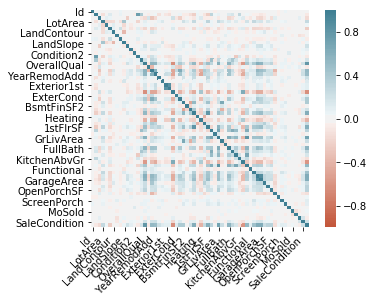

In [9]:

corr = DF2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '140px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

OverallQual, YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [12]:
features=pd.DataFrame(DF2[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']])


corr = features.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '140px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

newfeatures=np.array(features[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','GarageCars']])

In [13]:
xsc=StandardScaler().fit_transform(features)

C:\Users\M\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
xsc

array([[ 0.65147924,  1.05099379,  0.87866809, ...,  0.91220977,
         0.31172464,  0.35100032],
       [-0.07183611,  0.15673371, -0.42957697, ..., -0.31868327,
         0.31172464, -0.06073101],
       [ 0.65147924,  0.9847523 ,  0.83021457, ..., -0.31868327,
         0.31172464,  0.63172623],
       ...,
       [ 0.65147924, -1.00249232,  1.02402865, ...,  1.52765629,
        -1.02685765, -1.03391416],
       [-0.79515147, -0.70440562,  0.53949344, ..., -0.93412978,
        -1.02685765, -1.09005935],
       [-0.79515147, -0.20759447, -0.96256569, ..., -0.31868327,
        -1.02685765, -0.9216238 ]])

In [15]:

pca=PCA(n_components=3)
xtrain_pca= pca.fit(xsc)
print("components=")
print(pca.components_)
xtrain_pca

components=
[[ 0.3620734   0.27878501  0.26150732  0.30864506  0.31391267  0.33814515
   0.31854446  0.27411304  0.3487099   0.34123817]
 [-0.10673725 -0.50000002 -0.38643298  0.04923944  0.20859236  0.44200256
   0.09667293  0.52204748 -0.19898246 -0.16279401]
 [-0.08590042 -0.09998498 -0.29185437  0.56765557  0.51491499 -0.17287134
  -0.40260342 -0.30282026  0.04184089  0.15700339]]


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
xtrain_pca=pca.fit_transform(xsc)

In [17]:
xtrain_pca.shape

(1460, 3)

In [18]:
y=DF2['SalePrice']

In [19]:
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.metrics import recall_score, \
  precision_score, roc_auc_score, accuracy_score,confusion_matrix,roc_curve
r = ANN(solver='lbfgs', alpha=1e-5,
          hidden_layer_sizes=(3,4,4), random_state=1)
r.fit(xtrain_pca,y)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
DF3=pd.read_csv('housetest.csv')

In [21]:
xtest=(DF3[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']])

In [22]:
for x in xtest:
    print(np.mean(xtest[x]))

6.078821110349555
1971.357779300891
1983.6627827278958
1046.1179698216736
1156.534612748458
1486.0459218642907
1.570938999314599
6.385195339273475
1.7661179698216736
472.76886145404666


In [23]:
xtest['OverallQual']=xtest['OverallQual'].fillna(6)
xtest['YearBuilt']=xtest['YearBuilt'].fillna(value=1971)
xtest['YearRemodAdd']=xtest['YearRemodAdd'].fillna(value=1983)
xtest['TotalBsmtSF']=xtest['TotalBsmtSF'].fillna(value=1046)
xtest['1stFlrSF']=xtest['1stFlrSF'].fillna(1156)
xtest['GrLivArea']=xtest['GrLivArea'].fillna(value=1486)
xtest['GarageArea']=xtest['GarageArea'].fillna(value=472)

xtest['TotRmsAbvGrd']=xtest['TotRmsAbvGrd'].fillna(value=6)
xtest['FullBath']=xtest['FullBath'].fillna(value=1)
xtest['GarageCars']=xtest['GarageCars'].fillna(value=1)



C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [24]:
xsc2=StandardScaler().fit_transform(xtest)

C:\Users\M\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
pca=PCA(n_components=3)
xtest_pca=pca.fit(xsc2)
print("components=")
print(pca.components_)
xtest_pca

components=
[[ 0.35688218  0.29878004  0.27589569  0.30586338  0.30795944  0.33984528
   0.31239718  0.25509857  0.35170102  0.3420527 ]
 [-0.17521073 -0.46362543 -0.38455304  0.02472483  0.19538892  0.43777
   0.10739994  0.57524712 -0.14088177 -0.11725709]
 [-0.03002816 -0.11086477 -0.34381109  0.55352814  0.52043651 -0.17558391
  -0.39514363 -0.28209487  0.03267333  0.1540793 ]]


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
xtest_pca=pca.fit_transform(xsc2)

In [27]:
YP=r.predict(xtest_pca)

In [28]:
YP

array([135000, 140000, 185000, ..., 175000, 110000, 240000], dtype=int64)

In [29]:
DFYP=pd.DataFrame(YP)

In [30]:
DF3['SalePrice']=DFYP

In [31]:
Sub=DF3[['Id','SalePrice']]

In [32]:
#export_csv=Sub.to_csv('Downloads//Sub.csv',index=False)